# seaborn 데이터 시각화 1
- matplotlib을 더 쉽게 사용할 수 있도록 만든 라이브러리
- pip install seaborn

[관련 문서들 참고]

- [matplot pyplot 공식 도큐먼트 살펴보기](https://matplotlib.org/stable/gallery/index.html)  
- [seaborn 공식 도큐먼트 살펴보기](https://seaborn.pydata.org/examples/index.html)  
- [seaborn 내장 데이터셋](https://seaborn.pydata.org/generated/seaborn.load_dataset.html#)  
- [seaborn 디지털 도서](https://wikidocs.net/86290)

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from IPython.display import Image

# seaborn
import seaborn as sns

In [2]:
# warning 무시
import warnings
warnings.filterwarnings('ignore')

In [3]:
import matplotlib.pylab as plt
# '-' 깨짐 해결 모듈
import matplotlib as mpl

plt.rcParams["font.family"] = "Malgun Gothic"  # For Windows
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (8,4)
print(plt.rcParams["font.family"])

# 마이너스 깨짐 해결
mpl.rcParams["axes.unicode_minus"] = False

['Malgun Gothic']


## 0. Seaborn의 장점
matplotlib으로 대부분의 시각화가 가능하나, <span style="background-color:#F5F5F5"> seaborn </span>
을 사람들이 선하는 이유

### 0-1. seaborn에서만 제공되는 통계 기반 plot

In [4]:
tips = sns.load_dataset("tips")

In [5]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


#### tips 데이터 정보
- total_bill: 총 합계 요금표
- tip: 팁
- sex: 성별
- smoker: 흡연자 여부
- day: 요일
- time: 식사 시간
- size: 식사 인원

In [6]:
# 컬럼 이름 변경하고 파일로 저장하기
tips = tips.rename(columns={"sex": "gender"})
import os
path = "datas"
if not os.path.exists(path):
    os.mkdir(path)
tips.to_csv(f"{path}/sns_tips.csv", index=False)

In [7]:
tips

,total_bill,tip,gender,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


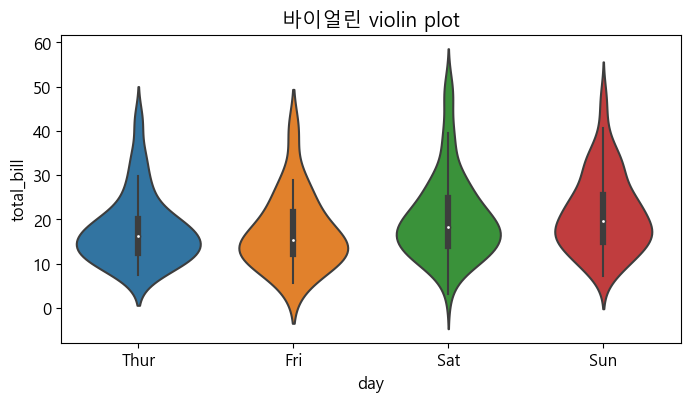

In [8]:
sns.violinplot(x="day", y="total_bill", data=tips)
plt.title('바이얼린 violin plot')
plt.show()

In [9]:
tips['day'].value_counts()

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

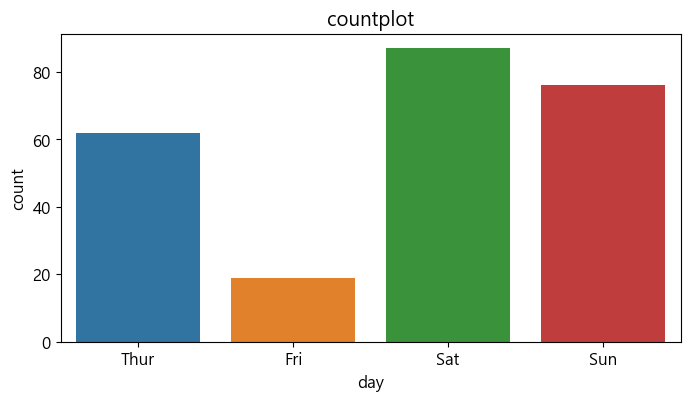

In [10]:
sns.countplot(x=tips['day'])
plt.title('countplot')
plt.show()

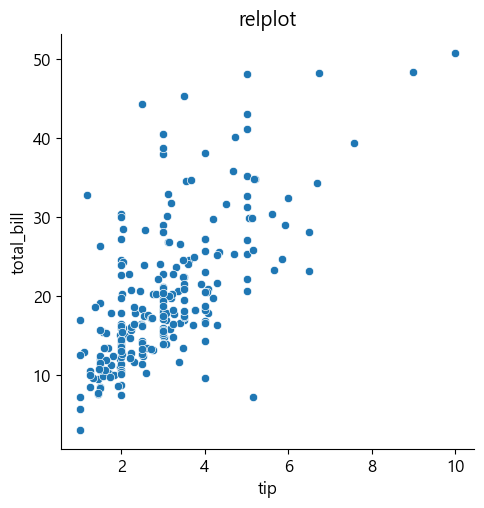

In [11]:
sns.relplot(x='tip', y='total_bill', data=tips)
plt.title('relplot')
plt.show()

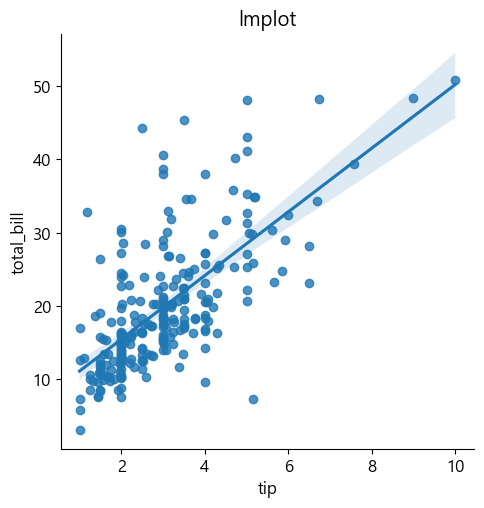

In [12]:
sns.lmplot(x='tip', y='total_bill', data=tips)
plt.title('lmplot')
plt.show()

In [13]:
file_path = "datas/sns_tips.csv"
tips = pd.read_csv(file_path)
tips

,total_bill,tip,gender,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [14]:
 tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   gender      244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


### 0-2. 아름다운 스타일링
seaborn의 최대 장점 중 하나인, 아름다운 컬러팔레트  
<span style="background-color:#F5F5F5"> matplotlib </span>의 기본 컬러 색상보다 <span style="background-color:#F5F5F5"> seaborn</span>은 스타일링에 크게 신경을 쓰지 않아도 **default 컬러가 예쁘게 조합** 됨

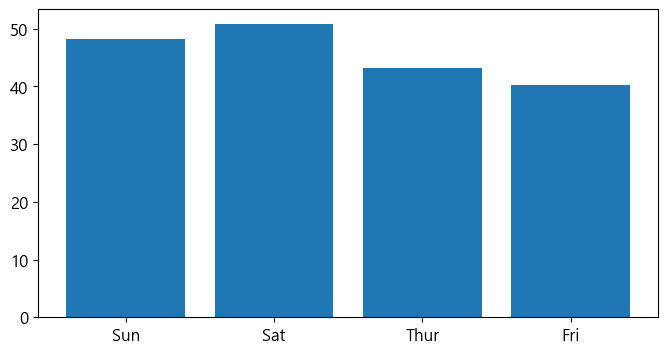

In [15]:
plt.bar(tips['day'], tips['total_bill'])
plt.show()

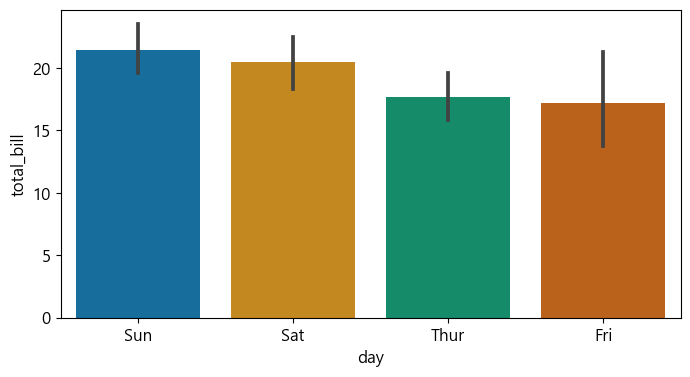

In [16]:
sns.barplot(x="day", y="total_bill", data=tips, palette='colorblind')
plt.show()

### 0-3. 컬러 팔레트

자세한 컬러팔레트는 공식 도큐먼트 참고

[Seaborn의 컬러팔레트](https://seaborn.pydata.org/tutorial/color_palettes.html)

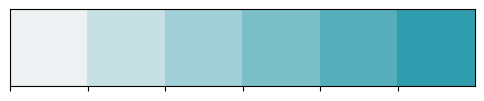

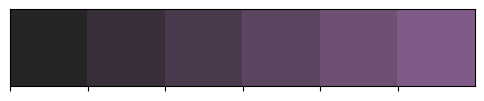

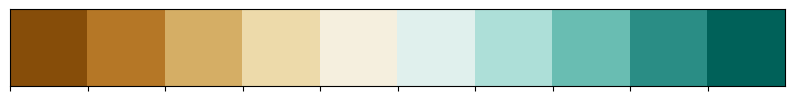

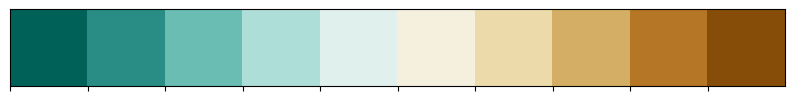

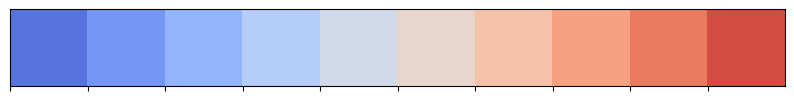

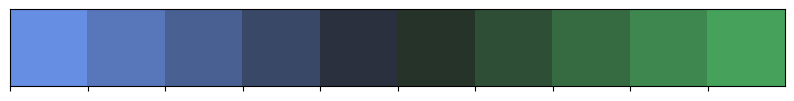

In [17]:
sns.palplot(sns.light_palette((210, 90, 60), input="husl"))
sns.palplot(sns.dark_palette("muted purple", input="xkcd"))
sns.palplot(sns.color_palette("BrBG", 10))
sns.palplot(sns.color_palette("BrBG_r", 10))
sns.palplot(sns.color_palette("coolwarm", 10))
sns.palplot(sns.diverging_palette(255, 133, l=60, n=10, center="dark"))

<Axes: xlabel='tip', ylabel='total_bill'>

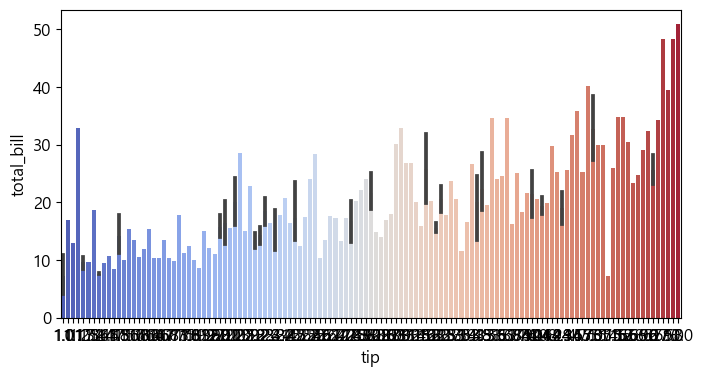

In [18]:
sns.barplot(x="tip", y="total_bill", data=tips, palette='coolwarm')

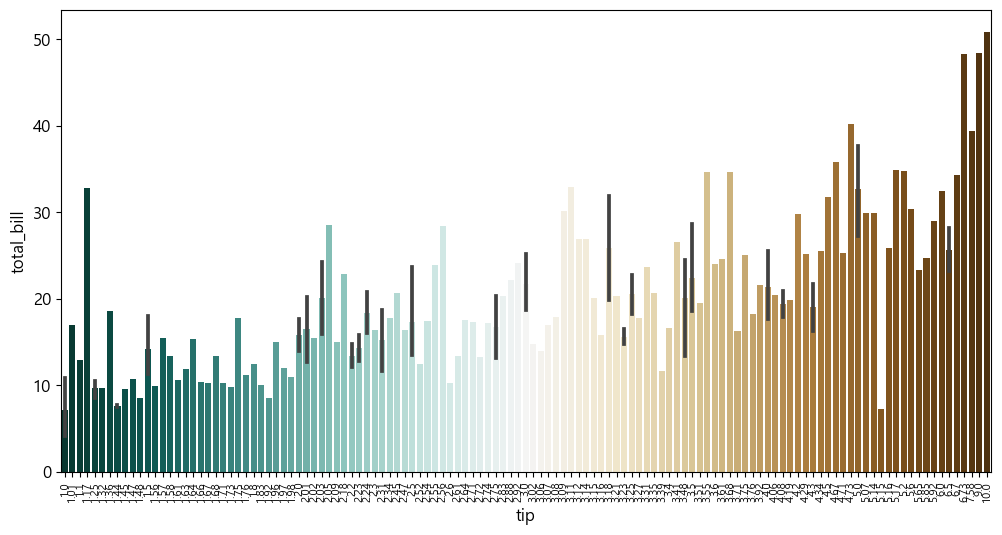

In [19]:
plt.figure(figsize=(12, 6))

sns.barplot(x="tip", y="total_bill", data=tips, palette='BrBG_r')
# x축 틱 레이블 각도 변경
plt.xticks(rotation=90, fontsize=8)
plt.show()

### 0-4. pandas 데이터프레임과 높은 호환성

In [20]:
tips

,total_bill,tip,gender,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


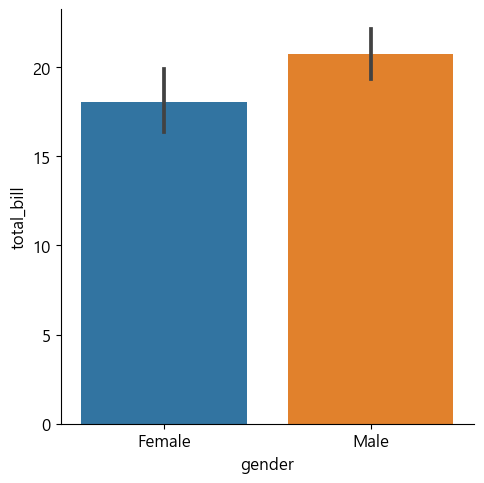

In [21]:
sns.catplot(x="gender", y="total_bill", 
            data=tips, 
            kind="bar")
plt.show()

<span style="background-color:#F5F5F5"> hue </span> 
  옵션으로 bar를 구분

- xtick, ytick, xlabel, ylabel을 알아서 생성해 줌
- legend 까지 자동으로 생성함
- 신뢰 구간도 알아서 계산하여 생성

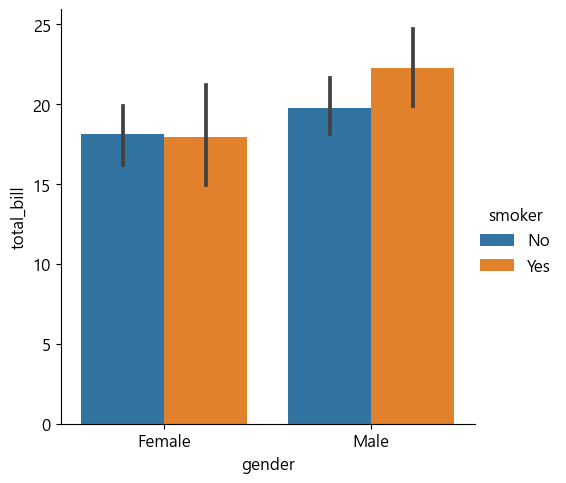

In [22]:
sns.catplot(x="gender", y="total_bill",
            hue="smoker", 
            data=tips, 
            kind="bar")
plt.show()

<span style="background-color:#F5F5F5"> col </span>옵션 하나로 그래프 자체를 분할해 줌

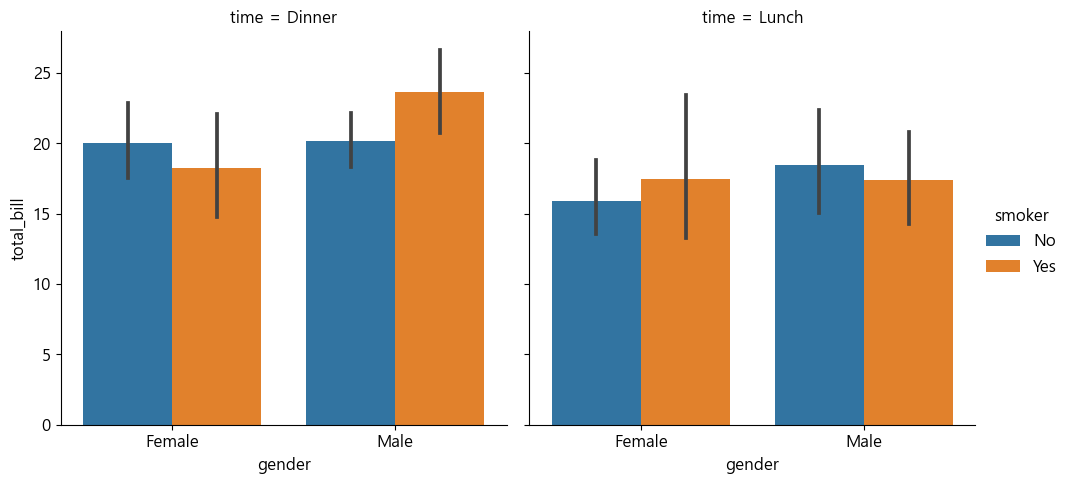

In [23]:
sns.catplot(x="gender", y="total_bill",
            hue="smoker", 
            col="time",
            data=tips, 
            kind="bar")
plt.show()

### 상관관계 계수 heatmap 시각화
- heatmap으로 시각화할 대상 컬럼은 모두 숫자로 되어있어야함.
- 상관관계 계수를 적용하기 범주형 데이터를 숫자로 변경하기

## [문제] 범주형 데이터를 label로 인코딩하기
- 범주형 데이터 컬럼을 찾기
- 범주형 컬럼의 values 확인
- 범주형 values -> 숫자로 변환

In [86]:
# 데이터 준비
file_path = "datas/sns_tips.csv"
tips = pd.read_csv(file_path)
tips.head()

,total_bill,tip,gender,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [62]:
# 범주형 데이터인 'gender', 'smoker', 'day', 'time' 열에 레이블 인코딩 적용
tips_copy = tips.copy()
print(tips_copy[["gender", "smoker", "day", "time"]].value_counts())
mapping = {
    "Female" : 0,
    "Male": 1
}
tips_copy["gender"] = tips_copy["gender"].map(mapping)
mapping = {
    "No" : 0,
    "Yes" : 1
}
tips_copy["smoker"] = tips_copy["smoker"].map(mapping)
mapping = {
    "Sun" : 0,
    "Sat" : 1,
    "Thur" : 2,
    "Fri" : 3
}
tips_copy["day"] = tips_copy["day"].map(mapping)
mapping = {
    "Dinner" : 0,
    "Lunch" : 1
}
tips_copy["time"] = tips_copy["time"].map(mapping)
tips = tips_copy

gender  smoker  day   time  
Male    No      Sun   Dinner    43
                Sat   Dinner    32
        Yes     Sat   Dinner    27
Female  No      Thur  Lunch     24
Male    No      Thur  Lunch     20
        Yes     Sun   Dinner    15
Female  Yes     Sat   Dinner    15
        No      Sun   Dinner    14
                Sat   Dinner    13
Male    Yes     Thur  Lunch     10
Female  Yes     Thur  Lunch      7
Male    Yes     Fri   Dinner     5
Female  Yes     Sun   Dinner     4
                Fri   Dinner     4
                      Lunch      3
Male    Yes     Fri   Lunch      3
        No      Fri   Dinner     2
Female  No      Fri   Lunch      1
                Thur  Dinner     1
                Fri   Dinner     1
Name: count, dtype: int64


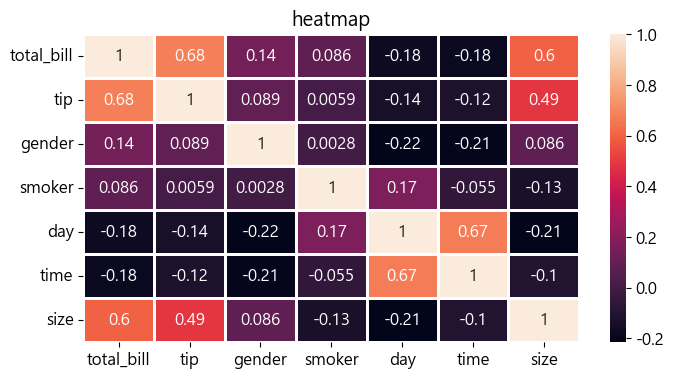

In [63]:
plt.title('heatmap')
sns.heatmap(tips_copy.corr(), annot=True, linewidths=1)
plt.show()

- data: 히트맵을 그릴 데이터셋, 2차원 배열 형태의 데이터를 입력받음
- annot: 히트맵 셀에 숫자 값을 표시할지 여부를 나타내는 부울값 또는 데이터 배열, 기본값은 False로 숫자 값이 표시되지 않음
- fmt: annot이 True로 설정된 경우 숫자 형식을 지정함, 예를 들어 ".2f"는 소수점 이하 2자리까지 표시하도록 지정함
- cmap: 히트맵의 색상 맵 지정, 예를 들어 "coolwarm", "viridis", "RdYlBu" 등 다양한 색상 맵을 사용할 수 있음
    - viridis: 영역별로 색상이 연속적으로 변화하는 색상 맵
    - plasma: 연속적인 분홍색과 청록색을 갖는 색상 맵
    - inferno: 연속적인 주황색과 검은색을 갖는 색상 맵
    - magma: 연속적인 검은색과 청록색을 갖는 색상 맵입
    - coolwarm: 차가운 색상과 따뜻한 색상이 교대로 나타나는 색상 맵
    - RdBu: 붉은색과 청록색이 교대로 나타나는 색상 맵
    - YlGnBu: 노란색, 녹색, 청록색, 파란색이 연속적으로 변화하는 색상 맵
- linewidths: 히트맵 셀 사이의 경계선 두께 지정
- linecolor: 히트맵 셀 사이의 경계선 색상을 지정
- cbar: 컬러바를 표시할지 여부를 나타내는 부울값임. 기본값은 True로 컬러바가 표시됨
- vmin, vmax : 컬러바의 범위 지정

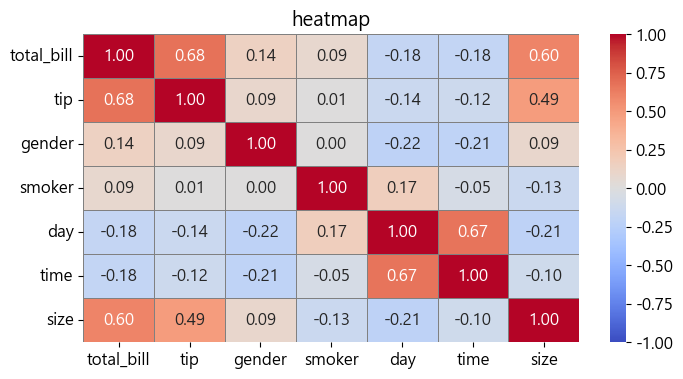

In [64]:
plt.title('heatmap')
sns.heatmap(tips.corr(), 
            annot=True, 
            fmt=".2f", 
            cmap="coolwarm", 
            linewidths=0.5, 
            linecolor="gray", 
            cbar=True,
            vmin=-1,
            vmax=1
           )
plt.show()

##### 강사님 코드

In [87]:
tips_inst = tips.copy()

In [88]:
tips_inst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   gender      244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [89]:
# 범주형 데이터 확인
tips_inst.select_dtypes(include="object").columns

Index(['gender', 'smoker', 'day', 'time'], dtype='object')

In [90]:
# 범주형 데이터 컬럼의 값 확인 : values_counts()
# gender column 확인
tips_inst["gender"].value_counts().sort_index()
tips_inst["day"].value_counts().sort_index()
tips_inst["time"].value_counts().sort_index()

time
Dinner    176
Lunch      68
Name: count, dtype: int64

In [91]:
# mapping 정의
mapping = {
    "Female"  :  0,
    "Male"     : 1
}
tips_inst["gender"] = tips_inst["gender"].map(mapping)
mapping = {
    "No" : 0,
    "Yes" : 1
}
tips_inst["smoker"] = tips_inst["smoker"].map(mapping)
mapping = {
    "Fri"  :   0,
    "Sat"   :  1,
    "Sun"    : 2,
    "Thur"    : 3
}
tips_inst["day"] = tips_inst["day"].map(mapping)
mapping = {
    "Dinner"  :  0,
    "Lunch"   :  1
}
tips_inst["time"] = tips_inst["time"].map(mapping)

In [92]:
tips_inst.columns

Index(['total_bill', 'tip', 'gender', 'smoker', 'day', 'time', 'size'], dtype='object')

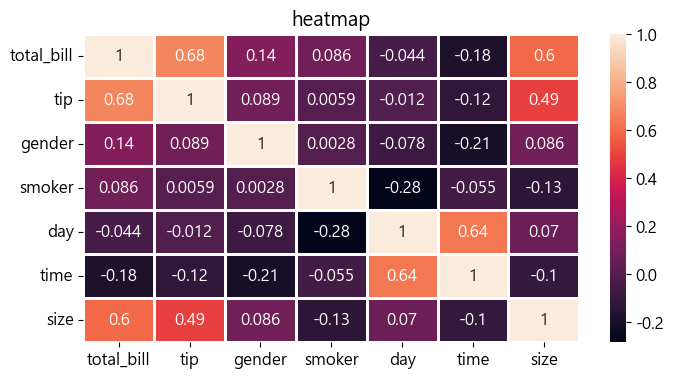

In [93]:
plt.title('heatmap')
sns.heatmap(tips_inst.corr(), annot=True, linewidths=1)
plt.show()

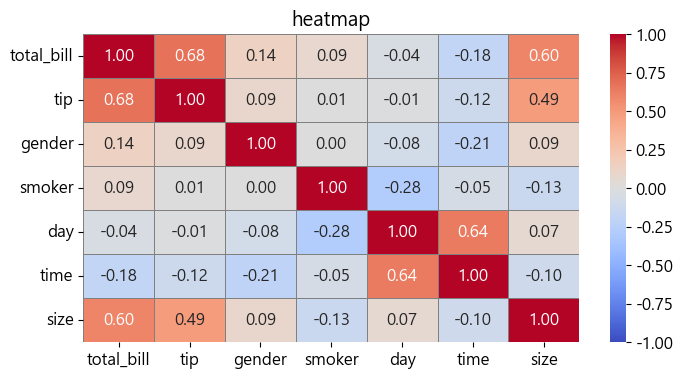

In [95]:
plt.title('heatmap')
sns.heatmap(tips_inst.corr(), 
            annot=True, 
            fmt=".2f", 
            cmap="coolwarm", 
            linewidths=0.5, 
            linecolor="gray", 
            cbar=True,
            vmin=-1,
            vmax=1
           )
plt.show()

## 1. Scatterplot
### 데이터 준비
0 ~ 1 사이의 임의의 랜덤한 값을 생성함

In [65]:
np.random.rand(50)

array([0.24948046, 0.13540521, 0.60777294, 0.5131305 , 0.5491352 ,
       0.3506646 , 0.50916381, 0.70389763, 0.44812292, 0.92350375,
       0.17166028, 0.07768965, 0.53881839, 0.30517762, 0.23833356,
       0.55908566, 0.52261407, 0.84997272, 0.46268742, 0.54205768,
       0.01999209, 0.46262134, 0.23492298, 0.34306107, 0.37417934,
       0.98291887, 0.22507955, 0.94602804, 0.79526614, 0.83368445,
       0.24096301, 0.88685415, 0.73959436, 0.1201478 , 0.39394778,
       0.45800943, 0.87384702, 0.99287982, 0.66578601, 0.57159541,
       0.18726424, 0.09710922, 0.24075489, 0.59900251, 0.46924   ,
       0.14381767, 0.24785095, 0.070826  , 0.7498774 , 0.73202479])